In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [ ]:
#load the dataframe and set column name
df=pd.read_csv('/content/drive/MyDrive/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A3S4RP6KVYCL98,B00FQCB7QI,5.0,1395446400
1,A2FNQXX8BZCX4V,B000DZDQLM,4.0,1170806400
2,A1ZKQPLEDYSR8O,B00DK2VX42,4.0,1391472000
3,A35D94NA2RGHLR,B00099ZG0G,5.0,1170720000
4,A1H79QIIXALK3N,B00746UANK,1.0,1391731200


In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A3S4RP6KVYCL98,B00FQCB7QI,5.0,1395446400
1,A2FNQXX8BZCX4V,B000DZDQLM,4.0,1170806400
2,A1ZKQPLEDYSR8O,B00DK2VX42,4.0,1391472000
3,A35D94NA2RGHLR,B00099ZG0G,5.0,1170720000
4,A1H79QIIXALK3N,B00746UANK,1.0,1391731200


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012403e+00
std,1.381362e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A3S4RP6KVYCL98,B00FQCB7QI,5.0
1,A2FNQXX8BZCX4V,B000DZDQLM,4.0
2,A1ZKQPLEDYSR8O,B00DK2VX42,4.0
3,A35D94NA2RGHLR,B00099ZG0G,5.0
4,A1H79QIIXALK3N,B00746UANK,1.0


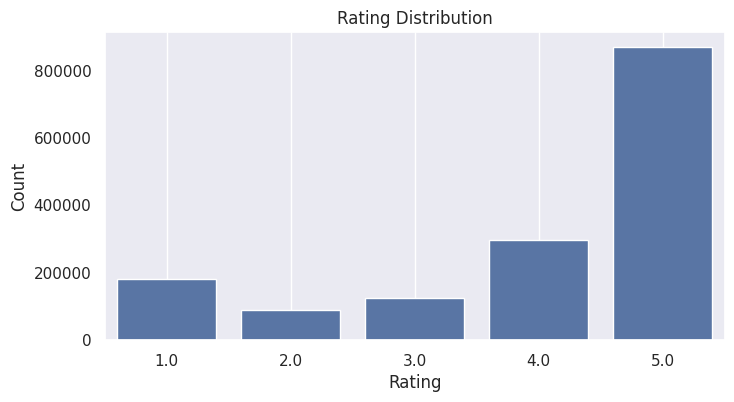

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225855
Total unique products :  237761


In [ ]:
#Analyzing the rating by user
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     117
A3OXHLG6DIBRW8    104
ADLVFFE4VBT8       93
A6FIAB28IS79       87
A680RUE1FDO8B      77
Name: rating, dtype: int64

In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 23 


In [ ]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,userId,productId,rating
6,A3CJKGB0E73WHC,B004K2WZS4,5.0
9,A7RPKJEFYYG66,B002NO7PWC,5.0
10,A16YC5XCQIA3B4,B007PJ4PKK,5.0
12,AS3VIJYVFCWCQ,B001GTT0VO,5.0
27,A2FZBO5DXBYGN8,B002I636XM,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3590
B00DR0PDNE    3251
B007WTAJTO    2748
B0019EHU8G    2459
B006GWO5WK    2412
Name: rating, dtype: int64

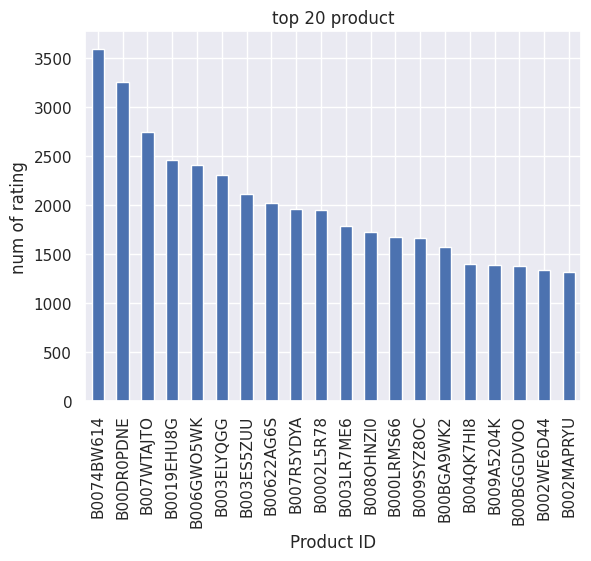

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 product')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.415525
1400532655,3.504587
140053271X,3.953488
B00000DM9W,4.506667
B00000J1V5,4.586207


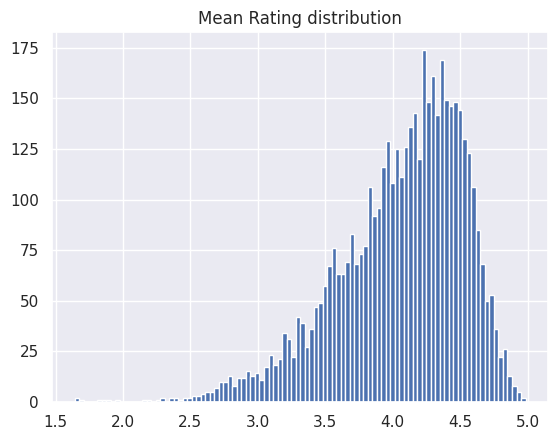

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9097370307385815

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.415525,219
1400532655,3.504587,109
140053271X,3.953488,86
B00000DM9W,4.506667,75
B00000J1V5,4.586207,58


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.489972,3590


In [ ]:
#min mean rating product
# Minimum rating of product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
# Number of records/products having minimum ratings
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  113


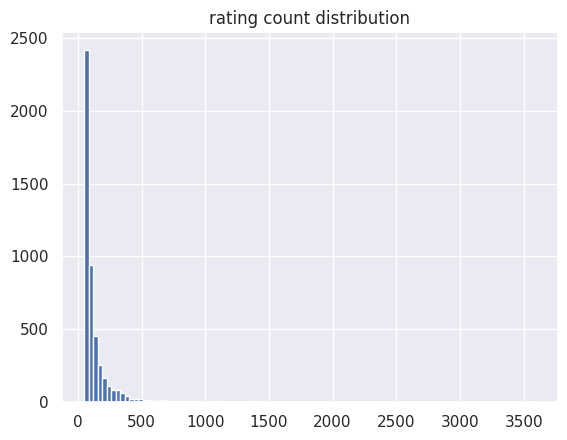

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

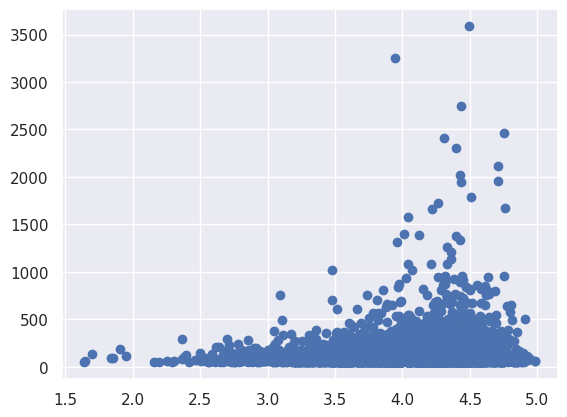

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.10958823509241086 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.3.2)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.23.5)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162665 sha256=ea68698d38db383a93f775385b5cf16790e5c48ff32c9757b247dbb83d2a194c

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)
test_pred

[Prediction(uid='A606NBHWMIALV', iid='B004SY9OVA', r_ui=5.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A276PIIBPPBQYZ', iid='B000HGIWN4', r_ui=5.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3PLWUYPRGFGCW', iid='B000TG4BA0', r_ui=4.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AAJGG6HSSJZNF', iid='B000VM60I8', r_ui=3.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A36VOCCLRJDHHO', iid='B008B6UA8M', r_ui=5.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1R44D1SGEWY4L', iid='B00067LYFW', r_ui=5.0, est=4.125797057566258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A32VVXU9CO6VC

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3135


1.3135199072191788

In [ ]:
#Model Based Collaborative function
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,B00000K2YR,B00001P4XA,...,B00HTPHK5W,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00INNP5VU,B00ISGCAJM,B00IT1WJZQ,B00IVPU786,B00IX2VGFA
userId,,,,,,,,,,,,,,,,,,,,,
A00239281ND4W7P7GR1N2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00882592E5IMSN8FDQ0I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03883071VTGNI55WHQZC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A04006723BV2CE0MIL4MQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A04292303RBXSDLG0MEK9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19884, 4391)

In [ ]:
#transpose the matrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00239281ND4W7P7GR1N2,A00882592E5IMSN8FDQ0I,A03883071VTGNI55WHQZC,A04006723BV2CE0MIL4MQ,A04292303RBXSDLG0MEK9,A053791814GJ2MJ3D4WNZ,A05404641UK4RYRXO43FQ,A058608498H4ON4LR346,A0595915RGWUK90TFII0,A0607747HU6W7BU3E1WM,...,AZXQKAMHK35PA,AZYE6762ZSHCS,AZYJE40XW6MFG,AZYQ5KHMPV2ST,AZYXE8U6XB0WF,AZZB7QPNM6ENC,AZZNLYJ4SRIRK,AZZOSYYSYI4SY,AZZQDEEOTBX96,AZZTC2OYVNE2Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J1V5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4391, 19884)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4391, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(4391, 4391)

In [ ]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


In [ ]:
# Correlation for all items with the item purchased by this customer based on items
# rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4391,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(280, 4391)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B000053HH5',
 'B000067RC4',
 'B00007E7JU',
 'B00007EDZG',
 'B00008VWOJ',
 'B000095SB6',
 'B00009R6WO',
 'B00009XVCZ',
 'B0000BZOGJ',
 'B0001DBEM4',
 'B0001Y7UAI',
 'B00024ENES',
 'B000261N6M',
 'B0002KVQBA',
 'B0007N55NW',
 'B0007QN18U',
 'B000812QC6',
 'B0009RKL62',
 'B000ALLMI8']

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# user-item ratings DataFrame
ratings_df = x_ratings_matrix

# Splitting the data
train_data, test_data = train_test_split(ratings_df.values, test_size=0.25, random_state=42)

# Ensure the training data is of floating-point type
train_data = train_data.astype(float)

# Function to perform SVD
def perform_svd(train_data, n_factors=2):
    svd_model = TruncatedSVD(n_components=n_factors)
    decomposed_matrix = svd_model.fit_transform(train_data)
    predicted_ratings = np.dot(decomposed_matrix, svd_model.components_)
    return predicted_ratings

# Solve the sparsity problem and predict ratings using SVD
predicted_ratings = perform_svd(train_data)

# Convert the test data to the same shape as predicted ratings for comparison
test_data_resized = np.zeros(predicted_ratings.shape)
test_data_resized[:test_data.shape[0], :test_data.shape[1]] = test_data

# Since we're comparing with predicted ratings, ensure comparison is in floating-point
test_data_resized = test_data_resized.astype(float)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data_resized, predicted_ratings))
mae = mean_absolute_error(test_data_resized, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.037592707614675536
MAE: 0.00031271977813133556


In [ ]:
pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 38.4 MB/s eta 0:00:00


In [ ]:
import implicit
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example user-item ratings DataFrame
ratings_df = x_ratings_matrix

# Splitting the data
train_data, test_data = train_test_split(ratings_df.values, test_size=0.25, random_state=42)

# Ensure the training data is of floating-point type
train_data = train_data.astype(float)

# Convert the training data to a sparse matrix
train_data_sparse = csr_matrix(train_data)

# Function to perform ALS
def perform_als(train_data, n_factors=2):
    als_model = implicit.als.AlternatingLeastSquares(factors=n_factors, iterations=50)
    als_model.fit(train_data_sparse)
    predicted_ratings = np.dot(als_model.user_factors, als_model.item_factors.T)
    return predicted_ratings

# Solve the sparsity problem and predict ratings using ALS
predicted_ratings = perform_als(train_data)

# Convert the test data to the same shape as predicted ratings for comparison
test_data_resized = np.zeros(predicted_ratings.shape)
test_data_resized[:test_data.shape[0], :test_data.shape[1]] = test_data

# Since we're comparing with predicted ratings, ensure comparison is in floating-point
test_data_resized = test_data_resized.astype(float)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data_resized, predicted_ratings))
mae = mean_absolute_error(test_data_resized, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


  0%|          | 0/50 [00:00<?, ?it/s]

RMSE: 0.03700598005907783
MAE: 0.0003810665100018837


In [ ]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example user-item ratings DataFrame
ratings_df = x_ratings_matrix

# Splitting the data
train_data, test_data = train_test_split(ratings_df.values, test_size=0.25, random_state=42)

# Ensure the training data is of floating-point type
train_data = train_data.astype(float)

# Function to perform NMF
def perform_nmf(train_data, n_factors=2):
    nmf_model = NMF(n_components=n_factors, init='random', random_state=42)
    W = nmf_model.fit_transform(train_data)
    H = nmf_model.components_
    predicted_ratings = np.dot(W, H)
    return predicted_ratings

# Solve the sparsity problem and predict ratings using NMF
predicted_ratings = perform_nmf(train_data)

# Convert the test data to the same shape as predicted ratings for comparison
test_data_resized = np.zeros(predicted_ratings.shape)
test_data_resized[:test_data.shape[0], :test_data.shape[1]] = test_data

# Since we're comparing with predicted ratings, ensure comparison is in floating-point
test_data_resized = test_data_resized.astype(float)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data_resized, predicted_ratings))
mae = mean_absolute_error(test_data_resized, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.03747383174356906
MAE: 0.00030874559673377874
